## Case Study Flatiron health insurance
### Importing all libraries 


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 1000) # see all columns
pd.set_option('display.max_rows', 1000)

### Loading the data and exporing 

In [5]:
#Load our dataframe account for the index columns
#and make 
df = pd.read_csv('case_study.csv', index_col=0)

In [6]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [138]:
new_df = df[['SEX','PHYSHLTH','_STATE']]

In [140]:
new_df.head(5)

,SEX,PHYSHLTH,_STATE
49938,2.0,0.0,9.0
49939,1.0,0.0,9.0
49940,2.0,2.0,9.0
49941,2.0,0.0,9.0
49942,2.0,0.0,9.0


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [33]:
df['PHYSHLTH'].head()


49938    0.0
49939    0.0
49940    2.0
49941    0.0
49942    0.0
Name: PHYSHLTH, dtype: float64

In [34]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

Now check to see how large our subset df.

In [35]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [36]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [170]:
# create dic with value map
# use dic with .replace method

health_new = {88:0,
             77: np.nan,
             99: np.nan}

sex_new = {1: 'Male',
          2: 'Female'}

new_state = {9:'Conneticut',
             34:'New Jersey',
             36:'New York'}

In [171]:
df['PHYSHLTH'].replace(health_new, inplace = True)
new_df['PHYSHLTH'].replace(health_new, inplace = True)


df.dropna(subset=['PHYSHLTH'], inplace=True)
new_df.dropna(subset=['PHYSHLTH'], inplace=True)

new_df_sex = new_df[new_df['SEX']!=9]

new_df_sex['SEX'].replace(sex_new, inplace=True)
new_df_sex['_STATE'].replace(new_state, inplace=True)

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [172]:
new_df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [177]:
new_df.pivot_table(index='_STATE', columns = 'PHYSHLTH')

SEX                                                    \
PHYSHLTH      0.0       1.0       2.0       3.0       4.0       5.0    
_STATE                                                                 
9.0       1.552736  1.620968  1.598086  1.583072  1.610811  1.658824   
34.0      1.555799  1.550976  1.603478  1.578947  1.632850  1.617089   
36.0      1.525367  1.507745  1.573957  1.522388  1.617391  1.610092   

                                                                           \
PHYSHLTH      6.0       7.0       8.0       9.0       10.0 11.0      12.0   
_STATE                                                                      
9.0       1.519231  1.666667  1.607143  1.750000  1.616822  1.5  1.631579   
34.0      1.584615  1.645570  1.645161  1.714286  1.655172  1.5  1.600000   
36.0      1.657143  1.578261  1.725000  1.250000  1.590580  1.5  1.600000   

                                                                           \
PHYSHLTH 13.0      14.0      15.0      16.0      17.0      18.0      19.0   
_STATE                                                                      
9.0       2.0  1.736842  1.581006  2.000000  1.428571  1.571429  1.666667   
34.0      1.0  1.620370  1.651376  1.625000  1.333333  1.166667  1.750000   
36.0      1.0  1.552846  1.637860  1.833333  1.500000  1.333333  1.333333   

                                                                            \
PHYSHLTH      20.0      21.0 22.0 23.0  24.0      25.0      26.0      27.0   
_STATE                                                                       
9.0       1.657895  1.454545  1.4  NaN  2.00  1.568182  2.000000  1.600000   
34.0      1.701493  1.629630  1.8  1.5  1.75  1.706897  2.000000  1.875000   
36.0      1.616883  1.809524  1.5  2.0  1.50  1.649123  1.333333  1.666667   

                                        
PHYSHLTH      28.0      29.0      30.0  
_STATE                                  
9.0       1.733333  1.500000  1.595166  
34.0      1.590909  1.583333  1.606157  
36.0      1.650000  1.615385  1.581535

In [176]:
df['PHYSHLTH'].value_counts(normalize=True)

0.0     0.631049
30.0    0.072243
2.0     0.059057
1.0     0.045574
3.0     0.035173
5.0     0.032358
10.0    0.022254
7.0     0.018994
15.0    0.018965
4.0     0.018431
20.0    0.011912
14.0    0.009660
6.0     0.005541
25.0    0.004712
8.0     0.002934
21.0    0.002074
12.0    0.002045
28.0    0.001689
29.0    0.001037
27.0    0.000652
18.0    0.000563
16.0    0.000474
17.0    0.000444
9.0     0.000444
22.0    0.000356
13.0    0.000296
19.0    0.000296
11.0    0.000237
24.0    0.000207
26.0    0.000207
23.0    0.000119
Name: PHYSHLTH, dtype: float64

In [145]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [48]:
df.shape

(33747, 358)

In [49]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [ ]:
#separate by sex 

dfemale = new_df_sex[new_df_sex['SEX'] == 'Female']

dmale = new_df_sex[new_df_sex['SEX'] == 'Male']

#take out zero sick days

no_sick_day = new_df_sex[new_df_sex['PHYSHLTH'] != 0]

dmale_no_sick = dmale[new_df_sex['PHYSHLTH'] != 0]

dfemale_no_sick = dfemale[new_df_sex['PHYSHLTH'] != 0

In [233]:
no_sick_day['PHYSHLTH'].describe()


count    12444.000000
mean        11.071279
std         10.910660
min          1.000000
25%          2.000000
50%          5.000000
75%         20.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [230]:
new_df_sex[new_df_sex['SEX'] =='Male' ].count()


SEX         14818
PHYSHLTH    14818
_STATE      14818
dtype: int64

In [231]:
new_df_sex[new_df_sex['SEX'] =='Female' ].count()

SEX         18911
PHYSHLTH    18911
_STATE      18911
dtype: int64

In [232]:
18911-14818

4093

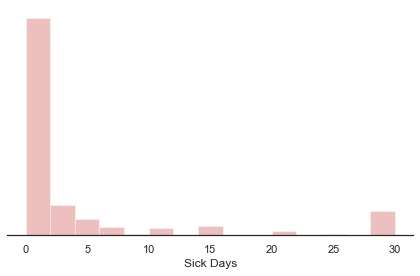

In [196]:
sns.set(style="white", palette="muted", color_codes=True)

d = new_df['PHYSHLTH']


# Set up the matplotlib figure
f, ax = plt.subplots()
ax = sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
ax = sns.distplot(d,kde=False, bins=15, color="r")
#sns.distplot(d, bins=20, kde=False, rug=True);
plt.xlabel('Sick Days')

plt.setp(ax, yticks=[])
plt.tight_layout()

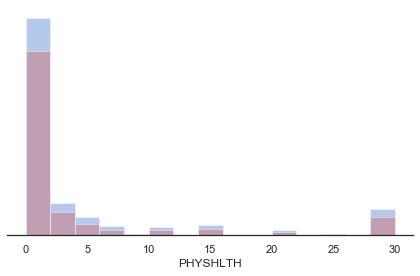

In [218]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(dfemale['PHYSHLTH'], kde=False, bins=15, color="b")

# Plot a kernel density estimate and rug plot
sns.distplot(dmale['PHYSHLTH'], kde=False, bins=15,  color="r")

plt.setp(axes, yticks=[])
plt.tight_layout()

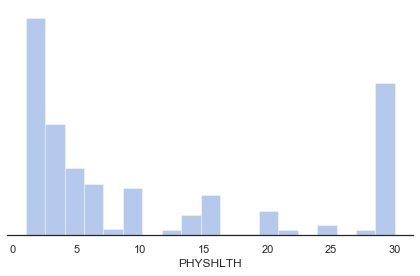

In [219]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)
sns.distplot(no_sick_day['PHYSHLTH'], kde=False, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()

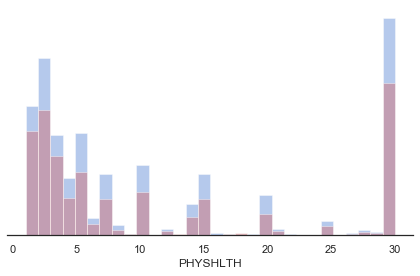

In [217]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(dfemale_no_sick['PHYSHLTH'], kde=False, bins=30, color="b")

# Plot a kernel density estimate and rug plot
sns.distplot(dmale_no_sick['PHYSHLTH'], kde=False, bins=30,  color="r")

plt.setp(axes, yticks=[])
plt.tight_layout()

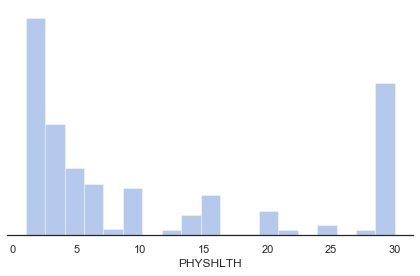

In [214]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)
sns.distplot(no_sick_day['PHYSHLTH'], kde=False, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [166]:
# descriptive statistics
sick_days = df.groupby('_STATE')['PHYSHLTH'].mean()
states = ['Conneticut', 'New Jersey', 'New York']

d = {'States': states, "Mean_Sick_Day": sick_days}
Sickday_mean = pd.DataFrame(d)

SD_mean = Sickday_mean.reset_index()
SD_mean.drop('_STATE',axis=1,inplace=True)
SD_mean

,States,Mean_Sick_Day
0,Conneticut,3.688562
1,New Jersey,4.380957
2,New York,4.148030


## 3. Generate a graphic that compares the average number of sick days for each state. 

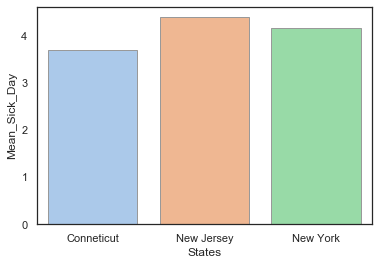

In [167]:
# code to graph those averages using matplotlib
ax1 = sns.barplot(x='States', y='Mean_Sick_Day', 
                  palette="pastel", edgecolor=".6", data=SD_mean);

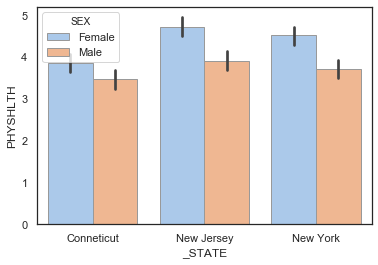

In [178]:
ax1 = sns.barplot(x='_STATE',y='PHYSHLTH', hue = 'SEX',
                  palette="pastel", edgecolor=".6", data=new_df_sex);

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [244]:
# code to create new colum for chronically sick


new_df_sex['CHRONIC'] = np.where(new_df_sex['PHYSHLTH'] >= 20, 1, 0)

new_df_sex

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEX,PHYSHLTH,_STATE,CHRONIC
49938,Female,0.0,Conneticut,0
49939,Male,0.0,Conneticut,0
49940,Female,2.0,Conneticut,0
49941,Female,0.0,Conneticut,0
49942,Female,0.0,Conneticut,0
...,...,...,...,...
303774,Male,0.0,New York,0
303775,Female,0.0,New York,0
303776,Male,6.0,New York,0
303777,Female,0.0,New York,0


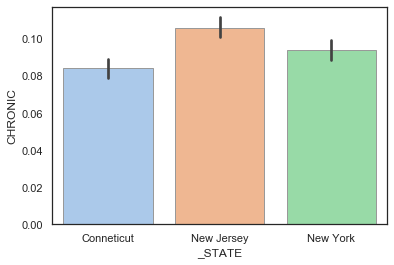

In [247]:
ax1 = sns.barplot(x='_STATE',y='CHRONIC',
                  palette="pastel", edgecolor=".6", data=new_df_sex);

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [ ]:
# code to calculate averages per state

In [ ]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  